<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/08_html.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data From the Web

Reading data from the web is an important task for some data analysis projects.  Web Scrapping is the gathering of that data.  There are lots of fantastic packages to read and parse html.  `requests` is going to gather the raw html for me.  `BeautifulSoup` will help me parse the code.

In [1]:
import requests
import pandas as pa
from bs4 import BeautifulSoup

Next I am going to look at a simple web page from Wikipedia.  I have been a big fan of **The Simpsons** for many years.  Let's look at the Wikipedia page for them.  [https://en.wikipedia.org/wiki/The_Simpsons](https://en.wikipedia.org/wiki/The_Simpsons)

Let's gather that html!

In [2]:
r = requests.get('https://en.wikipedia.org/wiki/The_Simpsons')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
#html_soup

## Basic Building Blocks

I do not print the html because it is very long!  Let's examine some aspects of our html that we have gathered

In [3]:
html_soup.title

<title>The Simpsons - Wikipedia</title>

I think the `title` is rather obvious.  It is what shows in my tab!

In [4]:
html_soup.a

<a id="top"></a>

The `a` is an anchor.  Normally that is a hyperlink but this one does not appear to be one!

In [5]:
html_soup.p

<p class="mw-empty-elt">
</p>

`p` stands for paragraph.  This one happens to be empty.  

In [6]:
html_soup.img

<img alt="Featured article" data-file-height="438" data-file-width="462" decoding="async" height="19" src="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/30px-Cscr-featured.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/40px-Cscr-featured.svg.png 2x" width="20"/>

`img` is an image.  Next are several classes of headers, six in total.

In [7]:
html_soup.h2

<h2 id="mw-toc-heading">Contents</h2>

The thing we will use the most for this class is `table`

In [8]:
html_soup.table

<table class="infobox vevent"><tbody><tr><th class="infobox-above summary" colspan="2" style="background: #CCCCFF; padding: 0.25em 1em; font-size: 125%;"><i>The Simpsons</i></th></tr><tr><td class="infobox-image" colspan="2"><a class="image" href="/wiki/File:The_Simpsons_yellow_logo.svg"><img alt="The Simpsons yellow logo.svg" data-file-height="206" data-file-width="464" decoding="async" height="111" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/The_Simpsons_yellow_logo.svg/250px-The_Simpsons_yellow_logo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/The_Simpsons_yellow_logo.svg/375px-The_Simpsons_yellow_logo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/98/The_Simpsons_yellow_logo.svg/500px-The_Simpsons_yellow_logo.svg.png 2x" width="250"/></a></td></tr><tr><th class="infobox-label" scope="row">Genre</th><td class="infobox-data category"><div class="plainlist">
<ul><li><a href="/wiki/Animated_sitcom" title="Animated sitcom">Animated si

You can combine these commands!

In [9]:
html_soup.table.a['href']

'/wiki/File:The_Simpsons_yellow_logo.svg'

This looks like an image on top of the table.  `href` is the link to the file that give that image.  You should go check out the webpage and see if you can find it!

Notice how I only keep getting the first of something?  There are many more links and table on the webpage!  Use the `find_all`

In [49]:
html_soup.table.find_all('a')

[<a class="image" href="/wiki/File:The_Simpsons_yellow_logo.svg"><img alt="The Simpsons yellow logo.svg" data-file-height="206" data-file-width="464" decoding="async" height="111" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/The_Simpsons_yellow_logo.svg/250px-The_Simpsons_yellow_logo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/98/The_Simpsons_yellow_logo.svg/375px-The_Simpsons_yellow_logo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/98/The_Simpsons_yellow_logo.svg/500px-The_Simpsons_yellow_logo.svg.png 2x" width="250"/></a>,
 <a href="/wiki/Animated_sitcom" title="Animated sitcom">Animated sitcom</a>,
 <a href="/wiki/Satire" title="Satire">Satire</a>,
 <a href="/wiki/Matt_Groening" title="Matt Groening">Matt Groening</a>,
 <a href="/wiki/The_Simpsons_shorts" title="The Simpsons shorts"><i>The Simpsons</i> shorts</a>,
 <a href="/wiki/James_L._Brooks" title="James L. Brooks">James L. Brooks</a>,
 <a href="/wiki/Sam_Simon" title="Sam Sim

This gives all the links from this table that includes the talent for the show.  You can access each link by using 

In [53]:
html_soup.table.find_all('a')[1]['href']

'/wiki/Animated_sitcom'

If you wanted to do some crawling along the web you might do something like:

In [54]:
links = html_soup.table.find_all('a')
listOfURLS = []

for link in links:
  listOfURLS.append('https://en.wikipedia.org' + link['href'])

listOfURLS

['https://en.wikipedia.org/wiki/File:The_Simpsons_yellow_logo.svg',
 'https://en.wikipedia.org/wiki/Animated_sitcom',
 'https://en.wikipedia.org/wiki/Satire',
 'https://en.wikipedia.org/wiki/Matt_Groening',
 'https://en.wikipedia.org/wiki/The_Simpsons_shorts',
 'https://en.wikipedia.org/wiki/James_L._Brooks',
 'https://en.wikipedia.org/wiki/Sam_Simon',
 'https://en.wikipedia.org/wiki/Dan_Castellaneta',
 'https://en.wikipedia.org/wiki/Julie_Kavner',
 'https://en.wikipedia.org/wiki/Nancy_Cartwright',
 'https://en.wikipedia.org/wiki/Yeardley_Smith',
 'https://en.wikipedia.org/wiki/Hank_Azaria',
 'https://en.wikipedia.org/wiki/Harry_Shearer',
 'https://en.wikipedia.org/wiki/List_of_The_Simpsons_cast_members',
 'https://en.wikipedia.org/wiki/Danny_Elfman',
 'https://en.wikipedia.org/wiki/The_Simpsons_Theme',
 'https://en.wikipedia.org/wiki/Richard_Gibbs',
 'https://en.wikipedia.org/wiki/Alf_Clausen',
 'https://en.wikipedia.org/wiki/Bleeding_Fingers_Music',
 'https://en.wikipedia.org/wiki/Li

Doesn't look like all of these worked but you should get the general idea!  We could visit each of these sites just like we did above!

## Your Turn

Navigate you the wikipedia page for your favorite television show or sports club. 

1. Display the title for the page
2. Within an interesting table, retrieve all links and store them in a list

## Tables Mean Data for Processing and Visualization!

In [10]:
len(html_soup.find_all('table'))

41

We see here that there are 41 tables stored in a list!  Let's get one of them by class.  There are also sometimes ids and a grab bag of otherways to grab different parts of the html.  Use your developer tools to examine your particular website!

In [11]:
tables = html_soup.find_all('table',class_="wikitable")
tables[0]

<table class="wikitable" style="text-align:center;">
<tbody><tr>
<th colspan="2" rowspan="3">Season
</th>
<th rowspan="3">No. of<br/>episodes
</th>
<th colspan="3">Originally aired
</th>
<th colspan="3">Viewership
</th></tr>
<tr>
<th rowspan="2">Season premiere
</th>
<th rowspan="2">Season finale
</th>
<th rowspan="2">Time slot (<a href="/wiki/Eastern_Time_Zone" title="Eastern Time Zone">ET</a>)
</th>
<th rowspan="2">Avg. viewers<br/>(in millions)
</th>
<th colspan="2">Most watched episode
</th></tr>
<tr>
<th>Viewers<br/>(millions)
</th>
<th>Episode title
</th></tr>
<tr>
<th><a href="/wiki/The_Simpsons_(season_1)" title="The Simpsons (season 1)">1</a>
</th>
<td><a href="/wiki/1989%E2%80%9390_United_States_network_television_schedule" title="1989–90 United States network television schedule">1989–90</a>
</td>
<td>13
</td>
<td>December 17, 1989
</td>
<td>May 13, 1990
</td>
<td>Sunday 8:30 pm
</td>
<th>27.8
</th>
<th>33.5
</th>
<td>"<a href="/wiki/Life_on_the_Fast_Lane" title="Life on the

Here I grabbed the first table, there were 3 that had the *class* of "wikitable".  To get the table in a nice form, I'll simply pass it to pandas using the `read_html` command.

In [47]:

df = pa.read_html(str(tables))[0]
df

Season             ...           Viewership                                      
   Season             ... Most watched episode                                      
   Season   Season.1  ...    Viewers(millions)                         Episode title
0       1    1989–90  ...                 33.5               "Life on the Fast Lane"
1       2    1990–91  ...                 33.6                    "Bart Gets an 'F'"
2       3    1991–92  ...                 25.5                       "Colonel Homer"
3       4    1992–93  ...                 28.6                   "Lisa's First Word"
4       5    1993–94  ...                 24.0              "Treehouse of Horror IV"
5       6    1994–95  ...                 22.2               "Treehouse of Horror V"
6       7    1995–96  ...                 19.7              "Treehouse of Horror VI"
7       8    1996–97  ...                 20.9               "The Springfield Files"
8       9    1997–98  ...                 19.8    "The Two Mrs. Nahasapeemapetilons"
9      10    1998–99  ...                 15.5                  "Maximum Homerdrive"
10     11  1999–2000  ...                 18.4                  "The Mansion Family"
11     12    2000–01  ...                 18.6                  "Worst Episode Ever"
12     13    2001–02  ...                 14.9                      "The Parent Rap"
13     14    2002–03  ...                 22.1       "I'm Spelling as Fast as I Can"
14     15    2003–04  ...                 16.3              "I, (Annoyed Grunt)-Bot"
15     16    2004–05  ...                23.07      "Homer and Ned's Hail Mary Pass"
16     17    2005–06  ...                11.63             "Treehouse of Horror XVI"
17     18    2006–07  ...                13.90                    "The Wife Aquatic"
18     19    2007–08  ...                 11.7           "Treehouse of Horror XVIII"
19     20    2008–09  ...                 12.4             "Treehouse of Horror XIX"
20     21    2009–10  ...                14.62     "Once Upon a Time in Springfield"
21     22    2010–11  ...                 12.6             "Moms I'd Like to Forget"
22     23    2011–12  ...                11.48               "The D'oh-cial Network"
23     24    2012–13  ...                 8.97           "Homer Goes to Prep School"
24     25    2013–14  ...                12.04                  "Steal This Episode"
25     26    2014–15  ...                10.62       "The Man Who Came to Be Dinner"
26     27    2015–16  ...                 8.33  "Teenage Mutant Milk-Caused Hurdles"
27     28    2016–17  ...                 8.19                      "Pork and Burns"
28     29    2017–18  ...                 8.04                    "Frink Gets Testy"
29     30    2018–19  ...                 8.20                 "The Girl on the Bus"
30     31    2019–20  ...                 5.63                  "Go Big or Go Homer"
31     32    2020–21  ...                 4.93            "Treehouse of Horror XXXI"
32     33    2021–22  ...                  TBA                                   TBA

[33 rows x 9 columns]

The column names are not quite right but that is not a terrible fix.  This was actually found later.  You can see below in the list way in which I built the tables.  There is more flexibility in the list way but the simplicity of the pandas way cannot be beat!

## Table the Hard Way

In [12]:
data =[]
for table in tables:
    headers = []
    rows = table.find_all('tr')
    for header in table.find('tr').find_all('th'):
        headers.append(header.text.replace('\n', ''))
    for row in table.find_all('tr')[1:]:
        values =[]
        for col in row.find_all(['th','td']):
            values.append(col.text.replace('\n', ''))
        data.append(values)
data

#pa.DataFrame(data[1:], columns  = data[0])

[['Season premiere',
  'Season finale',
  'Time slot (ET)',
  'Avg. viewers(in millions)',
  'Most watched episode'],
 ['Viewers(millions)', 'Episode title'],
 ['1',
  '1989–90',
  '13',
  'December 17, 1989',
  'May 13, 1990',
  'Sunday 8:30\xa0pm',
  '27.8',
  '33.5',
  '"Life on the Fast Lane"'],
 ['2',
  '1990–91',
  '22',
  'October 11, 1990',
  'July 11, 1991',
  'Thursday 8:00\xa0pm',
  '24.4',
  '33.6',
  '"Bart Gets an \'F\'"'],
 ['3',
  '1991–92',
  '24',
  'September 19, 1991',
  'August 27, 1992',
  '21.8',
  '25.5',
  '"Colonel Homer"'],
 ['4',
  '1992–93',
  '22',
  'September 24, 1992',
  'May 13, 1993',
  '22.4',
  '28.6',
  '"Lisa\'s First Word"'],
 ['5',
  '1993–94',
  '22',
  'September 30, 1993',
  'May 19, 1994',
  '18.9',
  '24.0',
  '"Treehouse of Horror IV"'],
 ['6',
  '1994–95',
  '25',
  'September 4, 1994',
  'May 21, 1995',
  'Sunday 8:00\xa0pm',
  '15.6',
  '22.2',
  '"Treehouse of Horror V"'],
 ['7',
  '1995–96',
  '25',
  'September 17, 1995',
  'May 19, 

I have to do some work here to get this into a dataframe.  Mostly just get the column names correct.  Several were not named and some ended up in there own row.  This is why it is important to look at your outputs!

In [24]:
titles = []
titles.append('Season')
titles.append('Years')
titles.append('Episodes')
for name in data[0]:
  titles.append(name)
titles.append('Most watched episode title')

df = pa.DataFrame(data[2:], columns = titles)
df

,Season,Years,Episodes,Season premiere,Season finale,Time slot (ET),Avg. viewers(in millions),Most watched episode,Most watched episode title
0,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,27.8,33.5,"""Life on the Fast Lane"""
1,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,24.4,33.6,"""Bart Gets an 'F'"""
2,3,1991–92,24,"September 19, 1991","August 27, 1992",21.8,25.5,"""Colonel Homer""",None
3,4,1992–93,22,"September 24, 1992","May 13, 1993",22.4,28.6,"""Lisa's First Word""",None
4,5,1993–94,22,"September 30, 1993","May 19, 1994",18.9,24.0,"""Treehouse of Horror IV""",None
5,6,1994–95,25,"September 4, 1994","May 21, 1995",Sunday 8:00 pm,15.6,22.2,"""Treehouse of Horror V"""
6,7,1995–96,25,"September 17, 1995","May 19, 1996",Sunday 8:00 pm (Episodes 1–24)Sunday 8:30 pm (...,15.1,19.7,"""Treehouse of Horror VI"""
7,8,1996–97,25,"October 27, 1996","May 18, 1997",Sunday 8:30 pm (Episodes 1–3)Sunday 8:00 pm (E...,14.5,20.9,"""The Springfield Files"""
8,9,1997–98,25,"September 21, 1997","May 17, 1998",Sunday 8:00 pm,15.3,19.8,"""The Two Mrs. Nahasapeemapetilons"""
9,10,1998–99,23,"August 23, 1998","May 16, 1999",13.5,15.5,"""Maximum Homerdrive""",None


Actually I still have a problem with my data.  Lots of the data had the airtime repeated from above.  Let's see if we can fix that

In [39]:
newdata =[]
for i in range(2,35):
  row = []
  if len(data[i])!= 9:
    for j in range(5):
      row.append(data[i][j])
    row.append(newdata[i-3][5])
    for j in range(5,8):
      row.append(data[i][j])
  else:
    row = data[i]
  newdata.append(row)


[['1',
  '1989–90',
  '13',
  'December 17, 1989',
  'May 13, 1990',
  'Sunday 8:30\xa0pm',
  '27.8',
  '33.5',
  '"Life on the Fast Lane"'],
 ['2',
  '1990–91',
  '22',
  'October 11, 1990',
  'July 11, 1991',
  'Thursday 8:00\xa0pm',
  '24.4',
  '33.6',
  '"Bart Gets an \'F\'"'],
 ['3',
  '1991–92',
  '24',
  'September 19, 1991',
  'August 27, 1992',
  'Thursday 8:00\xa0pm',
  '21.8',
  '25.5',
  '"Colonel Homer"'],
 ['4',
  '1992–93',
  '22',
  'September 24, 1992',
  'May 13, 1993',
  'Thursday 8:00\xa0pm',
  '22.4',
  '28.6',
  '"Lisa\'s First Word"'],
 ['5',
  '1993–94',
  '22',
  'September 30, 1993',
  'May 19, 1994',
  'Thursday 8:00\xa0pm',
  '18.9',
  '24.0',
  '"Treehouse of Horror IV"'],
 ['6',
  '1994–95',
  '25',
  'September 4, 1994',
  'May 21, 1995',
  'Sunday 8:00\xa0pm',
  '15.6',
  '22.2',
  '"Treehouse of Horror V"'],
 ['7',
  '1995–96',
  '25',
  'September 17, 1995',
  'May 19, 1996',
  'Sunday 8:00\xa0pm (Episodes 1–24)Sunday 8:30\xa0pm (Episode 25)',
  '15.1'

In [40]:
df = pa.DataFrame(newdata, columns = titles)

df

,Season,Years,Episodes,Season premiere,Season finale,Time slot (ET),Avg. viewers(in millions),Most watched episode,Most watched episode title
0,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,27.8,33.5,"""Life on the Fast Lane"""
1,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,24.4,33.6,"""Bart Gets an 'F'"""
2,3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,21.8,25.5,"""Colonel Homer"""
3,4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 pm,22.4,28.6,"""Lisa's First Word"""
4,5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 pm,18.9,24.0,"""Treehouse of Horror IV"""
5,6,1994–95,25,"September 4, 1994","May 21, 1995",Sunday 8:00 pm,15.6,22.2,"""Treehouse of Horror V"""
6,7,1995–96,25,"September 17, 1995","May 19, 1996",Sunday 8:00 pm (Episodes 1–24)Sunday 8:30 pm (...,15.1,19.7,"""Treehouse of Horror VI"""
7,8,1996–97,25,"October 27, 1996","May 18, 1997",Sunday 8:30 pm (Episodes 1–3)Sunday 8:00 pm (E...,14.5,20.9,"""The Springfield Files"""
8,9,1997–98,25,"September 21, 1997","May 17, 1998",Sunday 8:00 pm,15.3,19.8,"""The Two Mrs. Nahasapeemapetilons"""
9,10,1998–99,23,"August 23, 1998","May 16, 1999",Sunday 8:00 pm,13.5,15.5,"""Maximum Homerdrive"""


Do you ever get to the finish line and think to yourself, man there must be an easier way to do that...  Oh there totally was...

## Developer Tools

Your favorite web browser will have developer tools!  These will allow you to examine the raw html code while also hightlighting the rendered output with your browser.  This is very useful for webscrapping and figuring out how a website has been constructed!  I acessed the developer tools with F12 key but it may vary for you!

Here is a screen shot of me highlighting the first table.
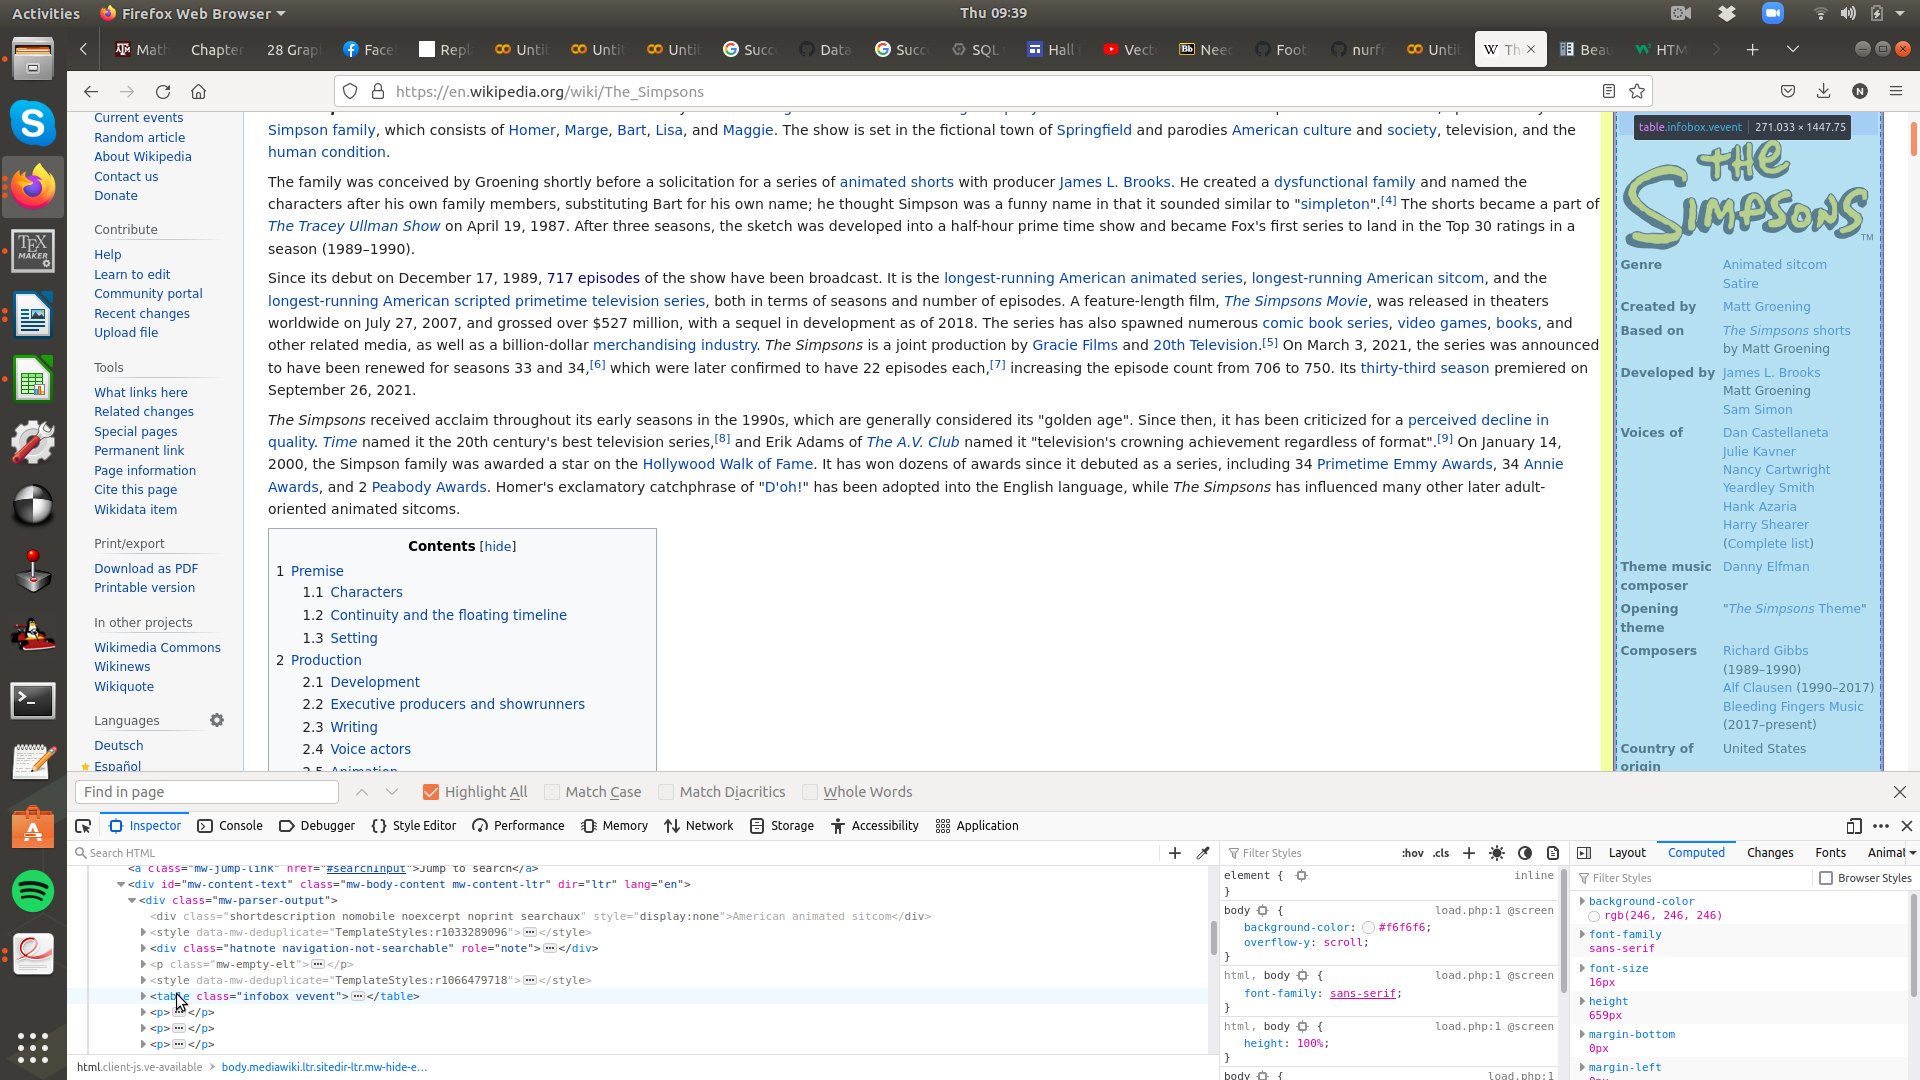

The developer tools are at the bottom and I have grabbed the first table that we have also scrapped.  The html is well organized in the developer tools but it also might have called a server and gotten external data from somewhere.  So be aware what you see here and on your `requests.get` may not be the same.